In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [3]:
train_test_data = pd.read_csv("training_data.csv")

In [4]:
# the model is trained only on a fraction of the available data
train_test_data_sample = train_test_data.sample(frac=0.1)

In [5]:
# the dataset is unbalanced towards residential pixels
train_test_data_sample.residential.value_counts()

1.0    2849732
2.0     708306
Name: residential, dtype: int64

In [6]:
# the dataset is (partially) balanced by reducing residential values by half (downsampling) 

nres_values = train_test_data_sample[train_test_data_sample.residential == 2]
res_values = train_test_data_sample[train_test_data_sample.residential == 1]

# for semi balanced model
res_values_sample = res_values.sample(frac=0.5)
train_test_data_sample = pd.concat([nres_values, res_values_sample])

In [7]:
train_test_data_sample.residential.value_counts()

1.0    1424866
2.0     708306
Name: residential, dtype: int64

In [8]:
# preparing data for model training
train_test_data_sample = train_test_data_sample.iloc[:, 1:]
X = train_test_data_sample.drop(['residential'], axis=1)
y = train_test_data_sample.residential.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
# model training
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
# model evaluation (Accuracy and Confusion Matrix)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred, normalize="true"))
print(accuracy_score(y_test, y_pred))

[[0.89127295 0.10872705]
 [0.50701063 0.49298937]]
0.7589989019059673


C:\Users\david\anaconda3\envs\ghsl_base\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\david\anaconda3\envs\ghsl_base\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


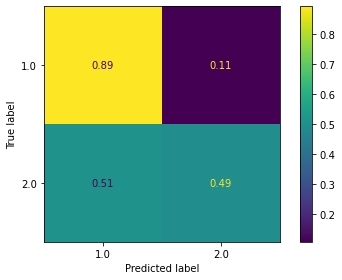

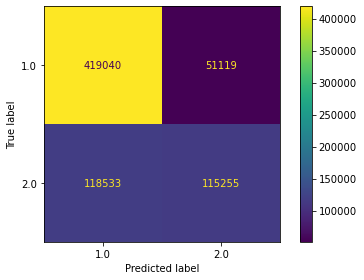

In [27]:
plot = plot_confusion_matrix(rf, X_test, y_test, normalize="true")
plt.tight_layout()
plt.savefig('confusion_matrix_normalized.png')

plot = plot_confusion_matrix(rf, X_test, y_test)
plt.tight_layout()
plt.savefig('confusion_matrixd.png')

In [266]:
filename = r'nres_cl_bufrac_pp_pixel_semi_balanced.pkl'
joblib.dump(rf, filename)  

['nres_cl_bufrac_pp_pixel_semi_balanced.pkl']